# Investigating unadjusted p-values from eQTL analysis

__Author:__ Bryan Quach  
__Date:__ April 26, 2017

### Estimated Analysis Time: <1 days

## Objective

There are multiple objectives of this analysis. Generally, the goal is to get a sense for expected results once multiple testing correction has been applied to the initial results. In a sense, we can consider the observations from this analysis as pre-liminary results. This analysis will address the following questions:

* How many total comparisons were done?
* How many genes were tested? How many markers were tested?
* What is the distribution of markers tested per gene?
* What is the p-value distribution of our results?
* Which gene and marker comparisons produced the most significant hits?

It is important to note that this analysis is for eQTL analysis results that used TPM values for lowly expressed gene filtering and for the expression phenotype.

## Software required

* [dplyr (R package)](https://cran.r-project.org/web/packages/dplyr/index.html)

## The Data

The data that we work with are results output from running a modified version of Daniel Oreper's eQTL analysis software. This software produces an R data file containing the environment in which the analysis was run, which includes a matrix of p-values with rows and columns corresponding to genes and markers respectively. In this analysis, we will look at results for the eQTL analyses in lung, liver, and kidney control samples.

## Calculating analysis statistics

### Lung

In [1]:
load("data/control_lung.Rdata")

#Calculate total number of comparisons
total.runs.lung <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.lung <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.lung <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.lung <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.lung <- na.omit(as.numeric(unlist(out.mat)))

### Liver

In [2]:
load("data/control_liver.Rdata")

#Calculate total number of comparisons
total.runs.liver <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.liver <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.liver <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.liver <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.liver <- na.omit(as.numeric(unlist(out.mat)))

### Kidney

In [3]:
load("data/control_kidney.Rdata")

#Calculate total number of comparisons
total.runs.kidney <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.kidney <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.kidney <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.kidney <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.kidney <- na.omit(as.numeric(unlist(out.mat)))

## Plotting statistics

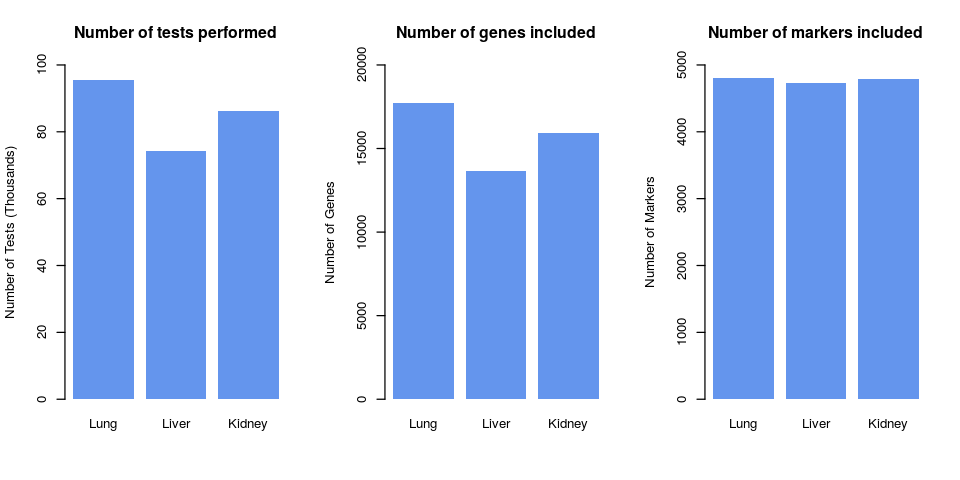

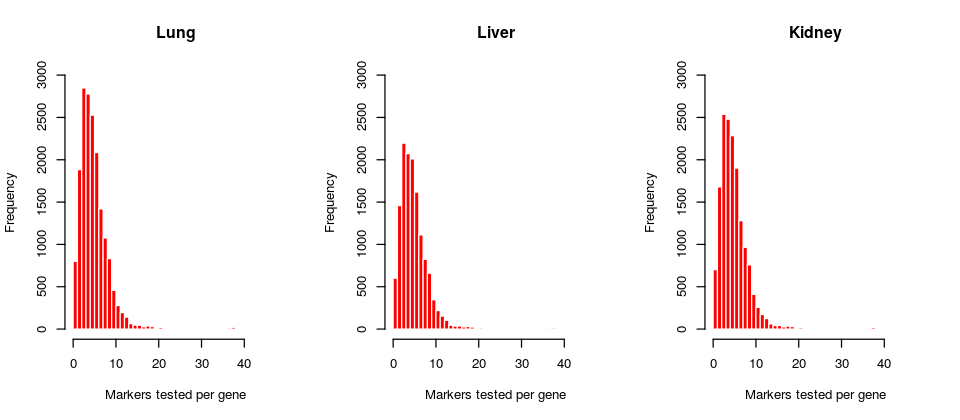

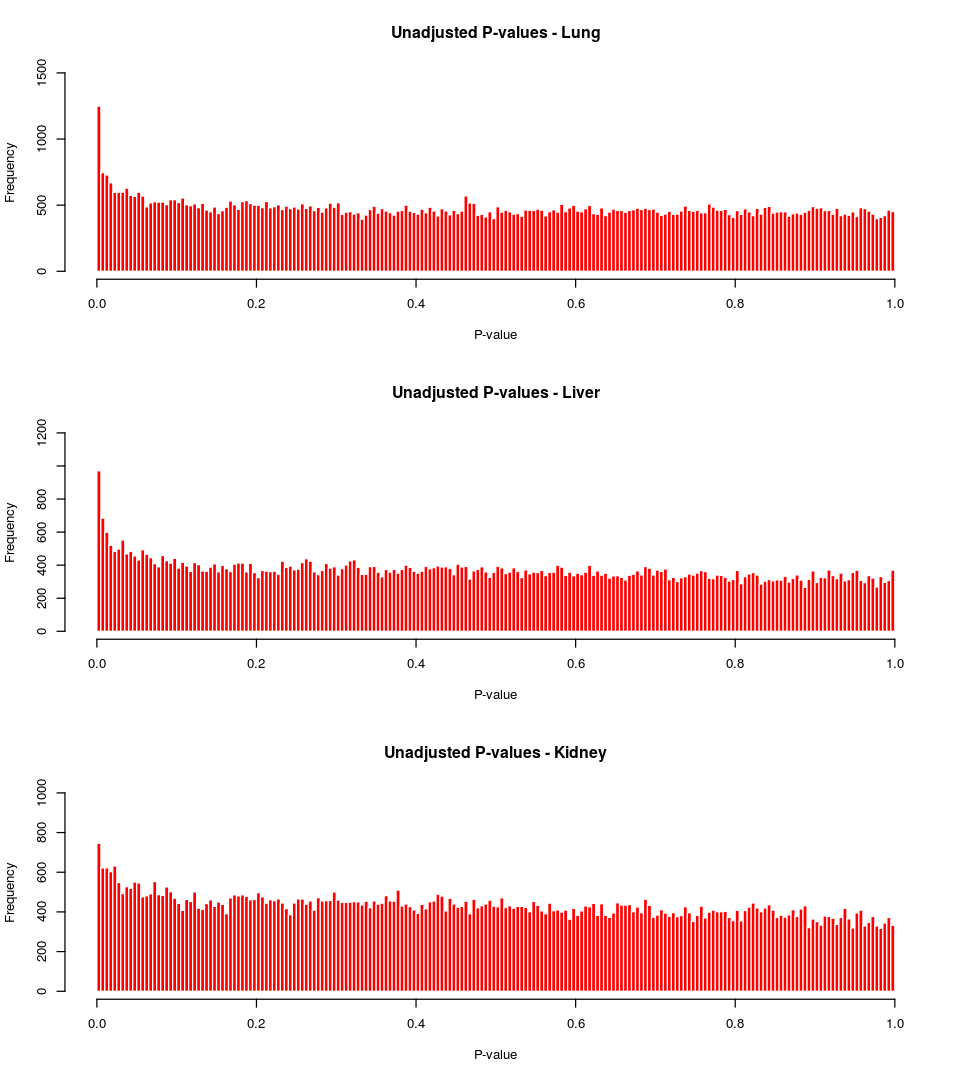

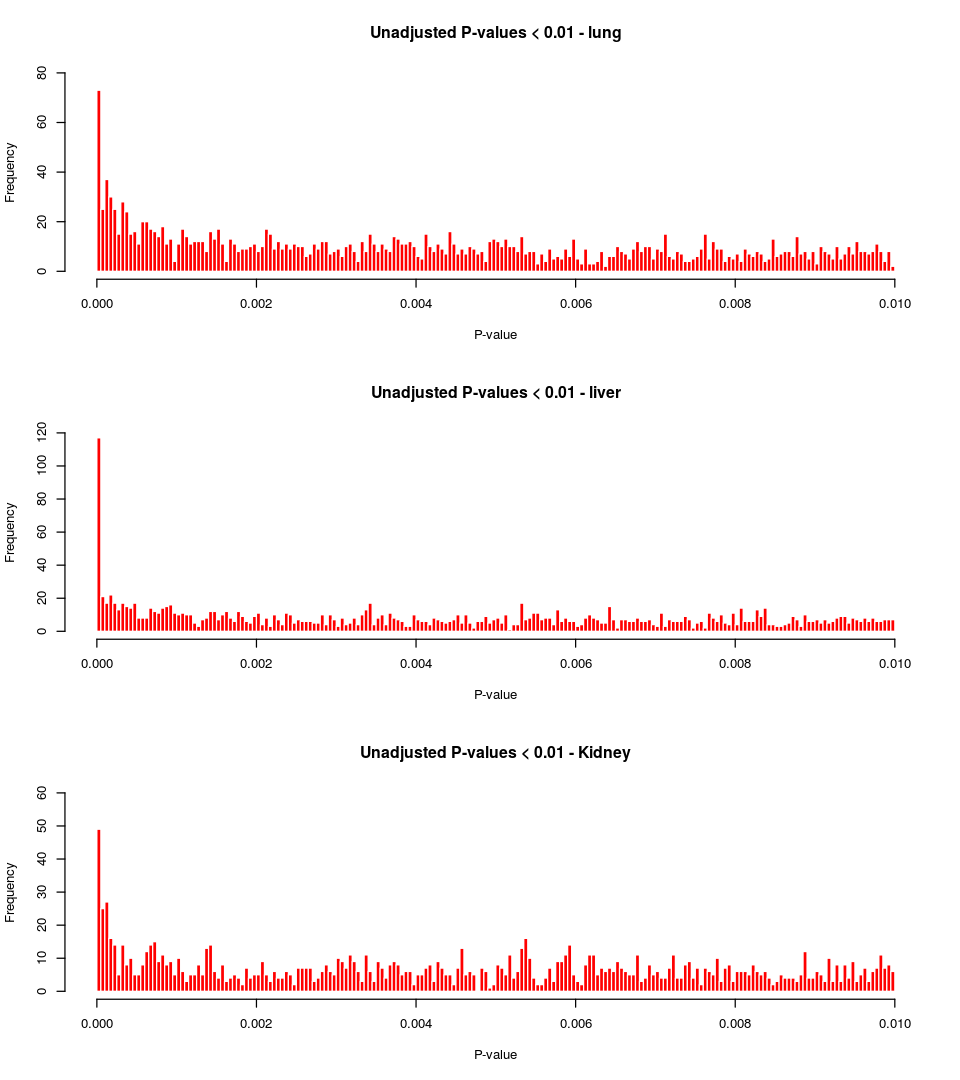

In [14]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

total.runs <- c(total.runs.lung, total.runs.liver, total.runs.kidney)
num.genes.tested <- c(num.genes.tested.lung, num.genes.tested.liver, num.genes.tested.kidney)
num.markers.tested <- c(num.markers.tested.lung, num.markers.tested.liver, num.markers.tested.kidney)

#Number of tests, genes, and markers
par(mfrow=c(1,3))
barplot(height=total.runs/1000, beside=T, ylab="Number of Tests (Thousands)", ylim=c(0,100),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of tests performed")
barplot(height=num.genes.tested, beside=T, ylab="Number of Genes", ylim=c(0,20000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of genes included")
barplot(height=num.markers.tested, beside=T, ylab="Number of Markers", ylim=c(0,5000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of markers included")

#Markers per gene
options(repr.plot.width=8, repr.plot.height=3.5)
par(mfrow=c(1,3))
hist(m.per.gene.lung, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Lung",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.liver, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Liver",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.kidney, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Kidney",
     ylab="Frequency", 
     xlab="Markers tested per gene")

#P-value distributions
options(repr.plot.width=8, repr.plot.height=9)
par(mfrow=c(3,1))
hist(pvals.lung, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Lung",
     ylab="Frequency",
     xlab="P-value")
hist(pvals.liver, breaks=200, freq=T, ylim=c(0,1200), 
     col="red", border="white",
     main="Unadjusted P-values - Liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney, breaks=200, freq=T, ylim=c(0,1000), 
     col="red", border="white",
     main="Unadjusted P-values - Kidney",
     ylab="Frequency", 
     xlab="P-value")

par(mfrow=c(3,1))
hist(pvals.lung[which(pvals.lung < 0.01)], breaks=200, freq=T, ylim=c(0,80), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - lung",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.liver[which(pvals.liver < 0.01)], breaks=200, freq=T, ylim=c(0,120), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney[which(pvals.kidney < 0.01)], breaks=200, freq=T, ylim=c(0,60), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - Kidney",
     ylab="Frequency", 
     xlab="P-value")


## Retrieving most significant tests

For each tissue, we retrieve the 100 gene-marker pairs that produced the most significant p-values and list them below.

In [15]:
library(dplyr)

# Function for searching p-value matrix
#
# Args:
#   needle - value to find
#   haystack - matrix to search through
#
# Returns a dataframe of the p-values with gene and marker names listed
find.value <- function(needle, haystack){
    hits <- which(haystack==needle, arr.ind=T)
    rnames <- rownames(haystack)[hits[,1]]
    cnames <- colnames(haystack)[hits[,2]]
    results <- c()
    for(i in 1:nrow(hits)){
        record <- c(rnames[i], cnames[i], needle)
        results <- rbind(results, record)
    }
    return(data.frame(results))
}

#Get p-value matrices for each tissue
load("data/control_lung.Rdata")
matrix.lung <- out.mat
load("data/control_liver.Rdata")
matrix.liver <- out.mat
load("data/control_kidney.Rdata")
matrix.kidney <- out.mat


#Get top 100 p-values per tissue
top.lung <- sort(pvals.lung)[1:100]
top.liver <- sort(pvals.liver)[1:100]
top.kidney <- sort(pvals.kidney)[1:100]

#Create gene and marker list for significant hits
lung.list <- bind_rows(lapply(top.lung, function(x){find.value(x, matrix.lung)}))
liver.list <- bind_rows(lapply(top.liver, function(x){find.value(x, matrix.liver)}))
kidney.list <- bind_rows(lapply(top.kidney, function(x){find.value(x, matrix.kidney)}))
colnames(lung.list) <- c("Gene", "Marker", "P-value")
colnames(liver.list) <- c("Gene", "Marker", "P-value")
colnames(kidney.list) <- c("Gene", "Marker", "P-value")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

In [16]:
#Display tables
cat("Lung\n")
lung.list
cat("Liver\n")
liver.list
cat("Kidney\n")
kidney.list

#Write tables to file
write.table(x=lung.list, file="results/lung_top100_hits_unadjusted_pvals.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=liver.list, file="results/liver_top100_hits_unadjusted_pvals.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=kidney.list, file="results/kidney_top100_hits_unadjusted_pvals.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")

Lung


Gene          Marker                                P-value             
1   Syne4         UNC12572462.UNC12573732               1.19388544619397e-17
2   Rbm42         UNC12549403.UNC12567534               1.00481353895887e-15
3   Rbm42         JAX00149774.UNC12572046               1.20117978995515e-15
4   Sipa1l3       UNC12572462.UNC12573732               2.2037326661337e-11 
5   Gm14288       JAX00512370.UNC4561324                5.34245813740719e-09
6   Gm14288       UNC4556542.UNC4558476                 5.51193518561509e-09
7   Sdhaf1        UNC12572462.UNC12573732               2.27833905128293e-08
8   Tbcb          JAX00149774.UNC12572046               3.17809881255101e-08
9   Tbcb          UNC12549403.UNC12567534               3.57710346442784e-08
10  Mir7212       UNC25181010.UNC25220921               5.54419754335336e-07
11  Kmt2b         UNC12572462.UNC12573732               7.1264397853757e-07 
12  Phtf1os       UNC5891025.UNC5893973                 1.27605149126282e-06
13  4930578M01Rik UNC26205052.UNC26205386               1.32200227066477e-06
14  Phtf1os       UNC5888495.UNC030164357               1.52833110344137e-06
15  Gon4l         UNC5732520.UNC5752814                 2.34885364229389e-06
16  Psap          backupJAX00290606.backupJAX00290771   2.55345905290314e-06
17  Psap          UNC18063481.JAX00195688               2.61539738941897e-06
18  Psap          UNC18062560.UNC18062560               2.62899473212067e-06
19  Fxyd5         UNC12572462.UNC12573732               3.01265765088002e-06
20  Psap          UNC18061032.UNC18061957               3.07462789388354e-06
21  Psap          UNC18062005.UNC18062389               3.07793967731485e-06
22  Psap          UNC18060895.UNC18060895               3.4584291829832e-06 
23  Psap          UNC18034355.JAX00290458               3.58409126916761e-06
24  Psap          UNC18049832.JAX00290510               3.68197547557686e-06
25  Psap          UNC18055450.JAX00018577               3.71118379801742e-06
26  Phtf1os       UNC5882459.UNC5888276                 3.89629457789992e-06
27  Gon4l         UNC5724119.backupJAX00110129          5.045516246807e-06  
28  Sertad1       UNC12543724.UNC12548710               6.61431134668199e-06
29  Gon4l         UNC5722551.UNC5723775                 6.62489463005453e-06
30  Gapdhs        UNC12572462.UNC12573732               7.31440201376258e-06
⋮   ⋮             ⋮                                     ⋮                   
71  Fxyd3         UNC12572462.UNC12573732               4.57481715937938e-05
72  Pygo2         UNC5724119.backupJAX00110129          4.59470424087017e-05
73  Smg5          UNC5722551.UNC5723775                 4.70385037047767e-05
74  Ube2q1        UNC5724119.backupJAX00110129          5.5309738027408e-05 
75  Cox7a2l       UNC28471365.UNC28471365               5.54304300744137e-05
76  Slc17a2       UNC22267867.UNC22282237               5.64032877777291e-05
77  Tyrobp        UNC12549403.UNC12567534               5.70764932708412e-05
78  Foxf2         UNC22359905.UNC22369547               6.24680062838e-05   
79  Ubap2l        UNC5732520.UNC5752814                 6.33500032995968e-05
80  Cox7a2l       UNC28488936.UNC28488936               6.43381906477902e-05
81  4930426D05Rik UNC28851094.UNC28857894               6.43420239595137e-05
82  Chtop         UNC5732520.UNC5752814                 6.63874303436955e-05
83  Zfp59         UNC12549403.UNC12567534               7.05275909977635e-05
84  Smg5          backupUNC030491543.backupUNC030491543 7.10427383105493e-05
85  Tyrobp        UNC12572462.UNC12573732               7.32825649412865e-05
86  Gmfg          UNC12543724.UNC12548710               7.37537052502622e-05
87  Tyrobp        JAX00149774.UNC12572046               7.3872595914528e-05 
88  Gmfg          UNC12543518.UNC12543518               7.79735416465984e-05
89  Pdgfrl        JAX00666596.UNC14627018               7.92163208125212e-05
90  Gmfg          UNC12542093.UNC12543129               8.27283872005273e-05


Liver


Gene          Marker                       P-value             
1   Fam20a        UNC20378120.UNC20388460      2.72208203893103e-33
2   Fam20a        JAX00031740.UNC20377562      4.45533121596594e-33
3   Fam20a        JAX00031724.JAX00031739      4.68558252285702e-33
4   Fam20a        UNC20365061.UNC20370504      5.61914170219389e-33
5   Cln3          UNC13808080.UNC13808351      6.09767711573649e-24
6   N4bp2         UNC9365487.UNC9365487        2.66475039235812e-21
7   N4bp2         UNC9340181.UNC9365328        3.52153011586468e-21
8   Cln3          UNC13807161.UNC13807864      1.28344625776443e-11
9   Dock4         UNC20954431.UNC20955852      2.94752608264237e-11
10  Arl4a         UNC20954431.UNC20955852      1.59703174077754e-10
11  Gstm7         UNC5918145.UNC5932712        1.75767954441886e-10
12  Arl4a         UNC20934810.UNC20941479      1.92118319052763e-10
13  Gstm7         UNC5933128.JAX00533731       1.93503971525479e-10
14  Gstm7         UNC030165183.UNC5917724      1.94112877255786e-10
15  Arl4a         UNC20941949.UNC20953816      1.99368180536934e-10
16  Cklf          UNC15422872.UNC15444168      3.1773943548034e-10 
17  Cklf          UNC15417874.UNC15422538      3.17934701582763e-10
18  Cklf          UNC15416961.JAX00679081      3.65466912553429e-10
19  Pxdn          UNC20791947.UNC20816738      3.8963105498538e-09 
20  Pxdn          UNC20817152.UNC20825770      5.27396426834415e-09
21  Npr1          UNC5732520.UNC5752814        9.54300639692436e-09
22  Fam8a1        UNC22553195.UNC22578692      2.55038667300236e-08
23  G6pc2         UNC3274971.UNC3298947        4.05961659115096e-08
24  Pmf1          UNC5724119.backupJAX00110129 7.67727598730398e-08
25  Pmf1          UNC5722551.UNC5723775        8.13635688628369e-08
26  Pmf1          UNC5732520.UNC5752814        8.16747812372071e-08
27  Prkar1a       UNC20378120.UNC20388460      1.13480806810499e-07
28  Pmf1          JAX00110044.UNC5722547       1.53575801049179e-07
29  Grhl1         UNC20742271.JAX00199937      1.79816406235143e-07
30  Prkar1a       JAX00031740.UNC20377562      1.85626039537633e-07
⋮   ⋮             ⋮                            ⋮                   
71  Hnrnpul2      UNC29871139.UNC29871202      8.11006815484109e-06
72  Hnrnpul2      UNC29870993.UNC29871077      8.35422907843354e-06
73  Hax1          UNC5732520.UNC5752814        8.42704552381771e-06
74  Hnrnpul2      UNC29870891.UNC29870891      8.53702373721894e-06
75  Grhl1         JAX00327082.JAX00327882      8.58887779325177e-06
76  Hnrnpul2      UNC29870739.UNC29870739      8.65856857272721e-06
77  2810403A07Rik UNC5724119.backupJAX00110129 8.71186312069911e-06
78  Hnrnpul2      UNC29870591.UNC29870591      8.78086487497081e-06
79  Fam104a       UNC20415153.UNC20418686      1.02157898820846e-05
80  Nol8          UNC22553195.UNC22578692      1.03351529396944e-05
81  2810403A07Rik UNC5732520.UNC5752814        1.10505737900831e-05
82  Nol8          UNC22578796.UNC22595965      1.15406740434933e-05
83  Rbm47         UNC9340181.UNC9365328        1.23038162684771e-05
84  Rbm47         UNC9365487.UNC9365487        1.23239313257522e-05
85  Slc26a10      UNC18963682.JAX00302406      1.35383869022657e-05
86  Rrnad1        JAX00110044.UNC5722547       1.43990737658922e-05
87  Slc26a10      JAX00302230.UNC18963675      1.47282348834548e-05
88  Taf1b         JAX00327915.JAX00327915      1.49999616641061e-05
89  Pnpt1         UNC110296583.UNC19322866     1.56598190282465e-05
90  Mertk         UNC3932612.UNC3936541        1.60011435151903e-05
91  Mertk         UNC3936694.UNC3937293        1.60011436248889e-05
92  Mertk         UNC3937526.UNC3940862        1.61458352866745e-05
93  Pnpt1         UNC19323322.JAX00025729      1.64149923766061e-05
94  Slc26a10      UNC18954707.UNC18961845      1.9121070505495e-05 
95  Cct3          JAX00110044.UNC5722547       1.95736769313399e-05
96  Rrnad1        UNC5722551.UNC5723775        1.9758066323537e-05 
97  Mertk         UNC3953195.JAX00503218       1.98328495207

Kidney


Gene          Marker                         P-value             
1   Pmel          UNC18963682.JAX00302406        3.79663660461655e-24
2   Pmel          JAX00302230.UNC18963675        4.08579531633888e-24
3   Pmel          JAX00302462.JAX00302527        4.38426392580554e-12
4   Pmel          UNC18970636.UNC101328991       4.49416140497787e-12
5   Pmel          UNC18980143.UNC18983661        4.89642158054831e-12
6   Cldn4         UNC10243742.UNC10244171        1.19236520148547e-09
7   Cldn4         JAX00136067.UNC10236173        1.65250438129864e-09
8   Siae          UNC16167936.UNC16176492        8.07288777558494e-08
9   Mir6399       UNC8315971.UNC8323209          8.24249453312524e-08
10  Inpp5d        UNC1067986.JAX00006232         1.50720511563911e-07
11  Mir6399       UNC8323552.UNC8325248          2.16258074043589e-07
12  Inpp5d        UNC1099115.UNC1103435          2.81137975511963e-07
13  Inpp5d        JAX00258020.UNC1098588         2.95181659032546e-07
14  Rps7          UNC20791947.UNC20816738        1.23315870667512e-06
15  Rps7          JAX00034273.UNC20791781        1.31001864353747e-06
16  Mir6399       JAX00568384.JAX00568392        1.80718134042663e-06
17  Mir6399       JAX00568401.UNC8343218         1.8290883812493e-06 
18  Mir6399       UNC8325771.UNC8325771          1.85935371058363e-06
19  Rpusd4        UNC16139398.JAX00689916        2.60101218969848e-06
20  Rpusd4        UNC16138281.UNC16139042        5.88403013046817e-06
21  Npcd          UNC25942378.UNC25942378        7.26346150223537e-06
22  Npcd          JAX00406581.UNC25941426        7.37258543930962e-06
23  Npcd          UNC25943263.UNC25949424        7.43474344057471e-06
24  Npcd          UNC25950161.UNC25955248        9.68658984611507e-06
25  Npcd          UNC25955430.JAX00407208        9.73125258419221e-06
26  Agfg1         UNC1043847.JAX00006066         1.01647266341011e-05
27  Mrpl3         JAX00704545.JAX00175342        1.20574745432656e-05
28  Aste1         JAX00704545.JAX00175342        1.27524072479238e-05
29  Hist1h1e      UNC22234794.UNC22263112        1.35355835268941e-05
30  Aste1         backupUNC090211667.JAX00175248 1.39659243080239e-05
⋮   ⋮             ⋮                              ⋮                   
71  Mir6954       UNC25896223.UNC25904367        8.3595856194896e-05 
72  Mir6954       UNC25905280.UNC25909242        8.40405654628438e-05
73  Mrpl17        UNC13545443.UNC13551048        9.75667915697654e-05
74  Mtm1          UNC30902191.UNC30940542        9.87399146326096e-05
75  2310069B03Rik JAX00615510.UNC11497618        0.000101940017814288
76  2310069B03Rik UNC11498802.UNC11507375        0.000103012478748768
77  4933400F21Rik UNC1099115.UNC1103435          0.000107785628488666
78  Mrpl3         backupUNC090211667.JAX00175248 0.000109997092036887
79  B2m           UNC3870640.JAX00502183         0.000114156328994285
80  B2m           UNC020174288.UNC020174288      0.000114263724373594
81  B2m           UNC3842618.UNC3869677          0.000114279836354115
82  Vwa5a         UNC16177202.UNC16189957        0.000116500501239524
83  Rhot2         UNC27706510.UNC27714988        0.000123847041428113
84  Foxred1       UNC16151701.UNC16151701        0.000128469949394794
85  Mob4          UNC714632.JAX00003976          0.000128577170515398
86  Ndnl2         UNC13005950.UNC13020010        0.00012937028390825 
87  2310069B03Rik UNC11507910.UNC060135143       0.000129786043452522
88  Foxred1       UNC16151938.UNC16154080        0.000131477208511731
89  Imp3          JAX00171561.JAX00695047        0.000132386535142885
90  Foxred1       UNC16154532.UNC16154532        0.000134560957428426
91  Foxred1       UNC16154850.UNC16154850        0.000135042048224019
92  Foxred1       JAX00169998.JAX00169998        0.000135524902078749
93  Ip6k1         UNC17088671.UNC17092085        0.000135960151401795
94  Foxred1       UNC16155218.UNC16155910        0.000137228842429428
95  Siae          UNC16190786.JAX00691017        0.000138443231749179
96  Foxred1   